## The Perceptron

In [1]:
import numpy as np
import numpy.random as rnd
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

In [3]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

/Users/ling/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1])

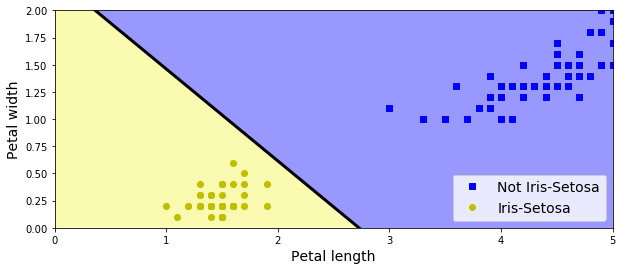

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

## Activation functions

In [5]:
def logit(z):
    return 1/(1+np.exp(-z))
def relu(z):
    return np.maximum(0,z)
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)
def tanh(z):
    return np.tanh(z)

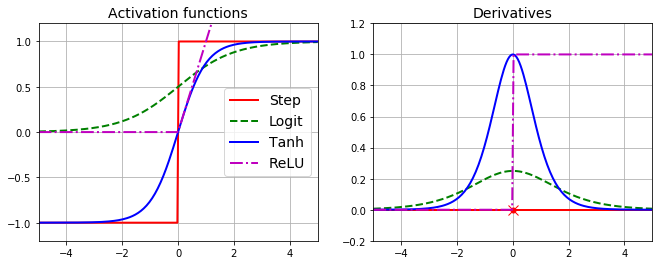

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

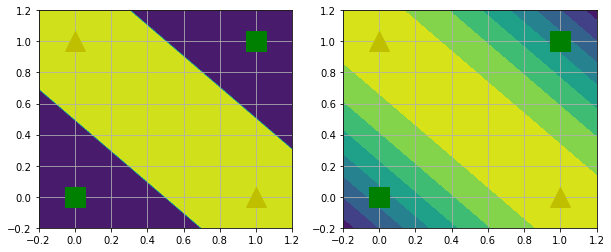

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.grid(True)
plt.show()

## FNN for MNIST

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

## using tf.learn

In [12]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                         feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1254952e8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/59/0pbnsns93t5cgn8b5n2kpxt00000gn/T/tmprwlwyxhh'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instruct

INFO:tensorflow:loss = 0.0465008, step = 5201 (0.399 sec)
INFO:tensorflow:global_step/sec: 250.569
INFO:tensorflow:loss = 0.0284622, step = 5301 (0.400 sec)
INFO:tensorflow:global_step/sec: 253.534
INFO:tensorflow:loss = 0.0416269, step = 5401 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.295
INFO:tensorflow:loss = 0.0417176, step = 5501 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.397
INFO:tensorflow:loss = 0.0990972, step = 5601 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.197
INFO:tensorflow:loss = 0.0100123, step = 5701 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.95
INFO:tensorflow:loss = 0.00932265, step = 5801 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.019
INFO:tensorflow:loss = 0.0846107, step = 5901 (0.395 sec)
INFO:tensorflow:global_step/sec: 272.026
INFO:tensorflow:loss = 0.124166, step = 6001 (0.367 sec)
INFO:tensorflow:global_step/sec: 182.576
INFO:tensorflow:loss = 0.0148375, step = 6101 (0.550 sec)
INFO:tensorflow:global_step/sec: 210.931
INFO:tensor

INFO:tensorflow:loss = 0.00856026, step = 13401 (0.452 sec)
INFO:tensorflow:global_step/sec: 270.041
INFO:tensorflow:loss = 0.0218133, step = 13501 (0.370 sec)
INFO:tensorflow:global_step/sec: 251.09
INFO:tensorflow:loss = 0.00747618, step = 13601 (0.398 sec)
INFO:tensorflow:global_step/sec: 222.872
INFO:tensorflow:loss = 0.00192963, step = 13701 (0.453 sec)
INFO:tensorflow:global_step/sec: 183.616
INFO:tensorflow:loss = 0.0053194, step = 13801 (0.543 sec)
INFO:tensorflow:global_step/sec: 195.98
INFO:tensorflow:loss = 0.00531271, step = 13901 (0.509 sec)
INFO:tensorflow:global_step/sec: 226.02
INFO:tensorflow:loss = 0.00343774, step = 14001 (0.443 sec)
INFO:tensorflow:global_step/sec: 198.634
INFO:tensorflow:loss = 0.00659004, step = 14101 (0.502 sec)
INFO:tensorflow:global_step/sec: 254.881
INFO:tensorflow:loss = 0.00309567, step = 14201 (0.393 sec)
INFO:tensorflow:global_step/sec: 191.474
INFO:tensorflow:loss = 0.000855188, step = 14301 (0.524 sec)
INFO:tensorflow:global_step/sec: 19

INFO:tensorflow:global_step/sec: 183.044
INFO:tensorflow:loss = 0.000950195, step = 21601 (0.544 sec)
INFO:tensorflow:global_step/sec: 183.141
INFO:tensorflow:loss = 0.0010964, step = 21701 (0.548 sec)
INFO:tensorflow:global_step/sec: 256.133
INFO:tensorflow:loss = 0.000984908, step = 21801 (0.389 sec)
INFO:tensorflow:global_step/sec: 226.069
INFO:tensorflow:loss = 0.000579074, step = 21901 (0.442 sec)
INFO:tensorflow:global_step/sec: 187.341
INFO:tensorflow:loss = 5.25971e-05, step = 22001 (0.534 sec)
INFO:tensorflow:global_step/sec: 194.486
INFO:tensorflow:loss = 0.000137044, step = 22101 (0.512 sec)
INFO:tensorflow:global_step/sec: 216.62
INFO:tensorflow:loss = 0.000949686, step = 22201 (0.465 sec)
INFO:tensorflow:global_step/sec: 204.634
INFO:tensorflow:loss = 0.002211, step = 22301 (0.486 sec)
INFO:tensorflow:global_step/sec: 184.461
INFO:tensorflow:loss = 0.0010825, step = 22401 (0.544 sec)
INFO:tensorflow:global_step/sec: 205.207
INFO:tensorflow:loss = 0.00139056, step = 22501 (

INFO:tensorflow:global_step/sec: 271.471
INFO:tensorflow:loss = 0.000447296, step = 29701 (0.368 sec)
INFO:tensorflow:global_step/sec: 274.868
INFO:tensorflow:loss = 0.000661427, step = 29801 (0.364 sec)
INFO:tensorflow:global_step/sec: 280.382
INFO:tensorflow:loss = 0.00101775, step = 29901 (0.357 sec)
INFO:tensorflow:global_step/sec: 280.433
INFO:tensorflow:loss = 2.35898e-05, step = 30001 (0.357 sec)
INFO:tensorflow:global_step/sec: 279.084
INFO:tensorflow:loss = 0.000464337, step = 30101 (0.359 sec)
INFO:tensorflow:global_step/sec: 248.108
INFO:tensorflow:loss = 0.000423292, step = 30201 (0.404 sec)
INFO:tensorflow:global_step/sec: 190.723
INFO:tensorflow:loss = 0.000900517, step = 30301 (0.525 sec)
INFO:tensorflow:global_step/sec: 185.652
INFO:tensorflow:loss = 0.00125711, step = 30401 (0.538 sec)
INFO:tensorflow:global_step/sec: 197.12
INFO:tensorflow:loss = 0.000569968, step = 30501 (0.509 sec)
INFO:tensorflow:global_step/sec: 182.197
INFO:tensorflow:loss = 0.00112549, step = 30

INFO:tensorflow:global_step/sec: 275.159
INFO:tensorflow:loss = 0.000313697, step = 37801 (0.363 sec)
INFO:tensorflow:global_step/sec: 285.704
INFO:tensorflow:loss = 0.00160112, step = 37901 (0.350 sec)
INFO:tensorflow:global_step/sec: 279.196
INFO:tensorflow:loss = 0.000224668, step = 38001 (0.359 sec)
INFO:tensorflow:global_step/sec: 274.841
INFO:tensorflow:loss = 0.000573888, step = 38101 (0.364 sec)
INFO:tensorflow:global_step/sec: 279.045
INFO:tensorflow:loss = 0.000553393, step = 38201 (0.358 sec)
INFO:tensorflow:global_step/sec: 283.45
INFO:tensorflow:loss = 6.32394e-05, step = 38301 (0.353 sec)
INFO:tensorflow:global_step/sec: 281.766
INFO:tensorflow:loss = 0.00025808, step = 38401 (0.355 sec)
INFO:tensorflow:global_step/sec: 281.463
INFO:tensorflow:loss = 0.000395036, step = 38501 (0.355 sec)
INFO:tensorflow:global_step/sec: 281.13
INFO:tensorflow:loss = 0.000591041, step = 38601 (0.356 sec)
INFO:tensorflow:global_step/sec: 276.128
INFO:tensorflow:loss = 0.000467431, step = 38

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x127770cf8>, 'hidden_units': [300, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x123466378>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [19]:
from sklearn.metrics import accuracy_score

y_pred = list(dnn_clf.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)
accuracy

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/linghuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.98360000000000003

In [21]:
from sklearn.metrics import log_loss

y_pred_proba = list(dnn_clf.predict_proba(X_test))
log_loss(y_test, y_pred_proba)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


/Users/linghuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.066553695423989159

In [22]:
dnn_clf.evaluate(X_test, y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


/Users/linghuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Starting evaluation at 2017-02-23-21:53:18
INFO:tensorflow:Finished evaluation at 2017-02-23-21:53:20
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.9836, auc = 0.997866, global_step = 40000, loss = 0.0665535


{'accuracy': 0.98360002,
 'auc': 0.99786645,
 'global_step': 40000,
 'loss': 0.066553511}

## Using plain TensorFlow

In [13]:
import tensorflow as tf

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 1 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        Z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(Z)
        else:
            return Z

### Construction Phase

In [14]:
tf.reset_default_graph()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="relu")
    logits = neuron_layer(hidden2, n_outputs, "output")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

### Execution Phase

In [15]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.86 Test accuracy: 0.8861
1 Train accuracy: 0.98 Test accuracy: 0.9095
2 Train accuracy: 0.94 Test accuracy: 0.9179
3 Train accuracy: 0.9 Test accuracy: 0.9256
4 Train accuracy: 0.92 Test accuracy: 0.932
5 Train accuracy: 0.88 Test accuracy: 0.9376
6 Train accuracy: 1.0 Test accuracy: 0.9407
7 Train accuracy: 1.0 Test accuracy: 0.9451
8 Train accuracy: 1.0 Test accuracy: 0.9467
9 Train accuracy: 0.96 Test accuracy: 0.9507
10 Train accuracy: 1.0 Test accuracy: 0.9525
11 Train accuracy: 1.0 Test accuracy: 0.9546
12 Train accuracy: 0.98 Test accuracy: 0.9558
13 Train accuracy: 0.96 Test accuracy: 0.958
14 Train accuracy: 1.0 Test accuracy: 0.9601
15 Train accuracy: 0.98 Test accuracy: 0.961
16 Train accuracy: 0.98 Test accuracy: 0.9624
17 Train accuracy: 1.0 Test accuracy: 0.9654
18 Train accuracy: 1.0 Test accuracy: 0.9659
19 Train accuracy: 0.98 Test accuracy: 0.9672


In [16]:
with tf.Session() as sess:
    saver.restore(sess, save_path) #"my_model_final.ckpt")
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    print(np.argmax(Z, axis=1))
    print(mnist.test.labels[:20])

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## deep MLP on the MNIST

In [17]:
tf.reset_default_graph()

from tensorflow.contrib.layers import fully_connected

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1, scope="hidden1")
    hidden2 = fully_connected(hidden1, n_hidden2, scope="hidden2")
    logits = fully_connected(hidden2, n_outputs, activation_fn=None, scope="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [18]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.84 Test accuracy: 0.9053
1 Train accuracy: 1.0 Test accuracy: 0.9191
2 Train accuracy: 0.92 Test accuracy: 0.9315
3 Train accuracy: 0.94 Test accuracy: 0.9374
4 Train accuracy: 0.92 Test accuracy: 0.9429
5 Train accuracy: 0.98 Test accuracy: 0.9474
6 Train accuracy: 0.98 Test accuracy: 0.9495
7 Train accuracy: 0.98 Test accuracy: 0.9538
8 Train accuracy: 0.96 Test accuracy: 0.9556
9 Train accuracy: 0.98 Test accuracy: 0.9589
10 Train accuracy: 0.94 Test accuracy: 0.961
11 Train accuracy: 0.98 Test accuracy: 0.9631
12 Train accuracy: 0.98 Test accuracy: 0.9624
13 Train accuracy: 1.0 Test accuracy: 0.9646
14 Train accuracy: 0.96 Test accuracy: 0.9655
15 Train accuracy: 1.0 Test accuracy: 0.9668
16 Train accuracy: 1.0 Test accuracy: 0.968
17 Train accuracy: 1.0 Test accuracy: 0.9689
18 Train accuracy: 1.0 Test accuracy: 0.9682
19 Train accuracy: 0.98 Test accuracy: 0.9691
